# Convolutional Neural Networks


# A Thought Experiment

You've gone back in time to the year 2010 to work as a programmer. Your boss tells you to write a "simple" program to tell the difference between pictures of Turkey's and Iguana's. How do you do it?

|Turkey | Iguana |
| -| -|
| <img src=https://raw.githubusercontent.com/jsearcy1/racsml/develop/assets/Turkey.jpg width="500"> | <img src=https://raw.githubusercontent.com/jsearcy1/racsml/develop/assets/iguana.jpg width="540"  >|


You've been studying ML so you know how to use an normal (dense) artificial neural network.

<img src=https://raw.githubusercontent.com/jsearcy1/racsml/master/assets/network_diagrams/nn_3_3_1.png>

this network uses features to classify instances between two groups.

## What Features would you use to classify these images?
   * Feathers
   * Scales
   * Other Ideas?
  
   


## How do you find these features in an image?

Their are a tone of techniques that have been developed to help for this for example you could use a difference of Gaussians edge detector, to look Turkey feathers.

<img src=https://micro.magnet.fsu.edu/primer/java/digitalimaging/processing/diffgaussians/diffgaussiansfigure1.jpg alt="source /https://micro.magnet.fsu.edu/primer/java/digitalimaging/processing/diffgaussians/index.html ">


|Turkey|  Iguana|
| -| -|
| <img src=https://raw.githubusercontent.com/jsearcy1/racsml/develop/assets/Turkey_edge.jpg width="500"> | <img src=https://raw.githubusercontent.com/jsearcy1/racsml/develop/assets/iguana_edge.jpg width="540"  >|


You could just count the number of edge pixels and get a feature for you ANN, but it might not be a very good feature because this edge detector highlights turkey feathers, but also things like leaves.

You can keep working on new techniques and adding new features until you get a system that starts to work. This is normally called to 'feature engineering' which underlies a lot of traditional machine vision techniques.

## Deep Learning

After months of feature engineering you might start thinking that there maybe an easier way.

**Why not build something that can learn the features from our images just like our ANNs learn which features are most important**

At this point you as a time traveling programmer would probably track down Yann LeCun to start learning about convolutional neural networks (CNN) and dive into deep-learning. As a bonus you could go win the Image-Net Challenge.



### ImageNet Error Rate
<img src=https://www.researchgate.net/profile/Frank_E_Curtis/publication/303992986/figure/fig7/AS:667038804615177@1536045852897/Historical-top5-error-rate-of-the-annual-winner-of-the-ImageNet-image-classification.png  alt=" source https://www.researchgate.net/publication/303992986_Optimization_Methods_for_Large-Scale_Machine_Learning">



# Convolutional Neural Networks
Deep Learning is a lot like using Legos. You have different pieces (or in this case layers) that can be combined anyway you want to build something useful. There are also a lot of ways of putting the pieces together that don't do anything at all, so it's important to understand your layers.

## Layers for Convolutional Neural Networks

1. A Dense layer (Just and ANN like you've seen before)
    * Used at the end for classification/regression tasks
2. Convolutional Layers
    * These are today's new layers that can learn features
3. Pooling Layers
    * These are layers are simple and reduce the size of of the last layer
    * Often you'll see a "MaxPool" layer that just returns the maximum value in a window (normally size 2)
    
4. Activations
    * Often these are considered a part of Dense and CNN layers, but they can also be included as layers themselves
    
## An Example Network

A common way of putting these layers together is a pyramid. Alternating the feature learning convolutional layers with size reducing pooling layers. Ending in a dense layer for classification.

<img src="https://pythonmachinelearning.pro/wp-content/uploads/2017/09/lenet-5.png" alt="source https://pythonmachinelearning.pro/introduction-to-convolutional-neural-networks-for-vision-tasks/">

### Why use a pyramid

* Fewer parameters required
    * Dense layers in particular require a huge number of parameters when using on large input data, for example millions of pixels or thousands of seimicgraph traces

* Richer Features
    * We will talk about this more, but imagine the edge finder above, edges alone may not tell you much, but edges can be combined into textures, eyes, beaks, by lower layers for more useful features

# Lets Program and Example in Keras

In [ ]:
import os
import os.path
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from random import random
from sys import version
print("Import complete")

Import complete


4423680/4422102 [==============================] - 0s 0us/step
A Single Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]


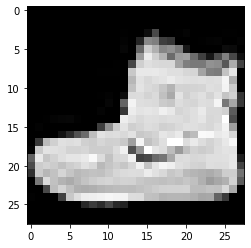

Example Label: 9


In [ ]:
# Load pre-shuffled MNIST data into train and test sets
(_xtrain, _ytrain), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

#We want to include a develop set so let's split the training set
train_index=[]
develop_index=[]
for i in range(len(_xtrain)):
    if random() <0.8:
        train_index.append(i)
    else:
        develop_index.append(i)
X_train=_xtrain[train_index]
Y_train=_ytrain[train_index]

X_develop=_xtrain[develop_index]
Y_develop=_ytrain[develop_index]


np.set_printoptions(linewidth=115)
n_targets=np.max(Y_test)+1
print('A Single Image:\n',X_train[0])
plt.imshow(X_train[0],cmap='gray')
plt.show()
print('Example Label:', Y_train[0])

* Note above that the labels are integers from 0-9
* Also note the images are integers from 0-255 (uint8)

We will deal with the labels first. Lets make some useful arrays and dictionaries to keep track of what each integer means

In [ ]:
# This is useful for making plots it takes an integer
lookup_dict={
    0 :'T-shirt/top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle boot'
}


#Lets make a list in the order of the labels above so [T-Shirt,Trouser,...]
labels=list(lookup_dict.values())

#Check to make sure labels list is in the right order (not guaranteed in python < 3.6)
if not all([v==lookup_dict[i] for i,v in enumerate(labels) ]):
    print('This looks like an old version of python making labels the long way, you are using python version', version)
    labels=['' for i in range(n_targets) ] #make a list with the right size
    for key in lookup_dict:
        labels[key]=lookup_dict[key] #Assign list to the vaules

#Always good to make simple checks that what you think is going to work actually is working
#Here we check that our array of labels is in the same order as the dictionary we wrote above
assert(all([v==lookup_dict[i] for i,v in enumerate(labels) ]))
print("Array and dictionary are in same order")

#Another Simple Check (Keras is well tested this will work, but it's good to get in the habit when using your own data)
assert(len(X_train)==len(Y_train))
print("X_train and Y_train are the same length")
assert(len(X_develop)==len(Y_develop))
print("X_develop and Y_develop are the same length")
assert(len(X_test)==len(Y_test))
print("X_test and Y_test are the same length")

Array and dictionary are in same order
X_train and Y_train are the same length
X_develop and Y_develop are the same length
X_test and Y_test are the same length


In [ ]:
Y_train_one_hot = tf.keras.utils.to_categorical(Y_train, 10)
Y_develop_one_hot =  tf.keras.utils.to_categorical(Y_develop, 10)
Y_test_one_hot =  tf.keras.utils.to_categorical(Y_test, 10)

print('Example:',Y_train[0],'=',Y_train_one_hot[0])

Example: 9 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Now lets handle the image data
* Our Convolutional Neural Networks need a shape of Batch x Height x Width x Channels, for us (batch_size x 28 x 28 x 1)
* In this case channels=1, but for a color image you'll have 3 RGB and sometimes 4 with a transparency channel RGBA
* It's much easier for a neural network to handle data with range from 0-1, rather than 0-255, so we will scale the data

Datatype: uint8 
Max value: 255


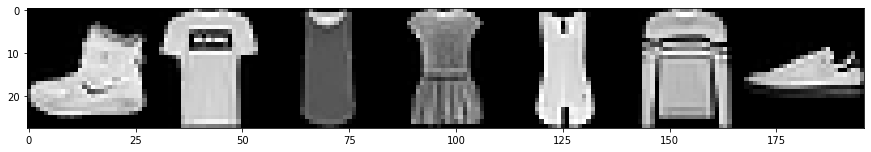

In [ ]:

f=plt.figure(figsize=(15,3))
plt.imshow(np.squeeze(np.hstack(X_train[0:7])),cmap='gray') #hstack aranges the first 7 images into one long image

#Reshape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_develop = X_develop.reshape(X_develop.shape[0], 28, 28, 1)


print("Datatype:",X_train.dtype, "\nMax value:", X_train.max())

Notice that the pixel values imported as an integer array that saturates at `255`.  Let's turn the data into floats $\in [0, 1]$.

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

if X_train.max()>1:
    X_train = X_train/255
    X_test = X_test/255
    X_develop = X_develop/255

assert(np.max(X_train) <=1)
assert(np.max(X_test) <=1)
assert(np.max(X_develop) <=1)
print("all sets scaled to float values between", X_train.min(), "and", X_train.max())


all sets scaled to float values between 0.0 and 1.0


# Convolutional Neural Networks vs. Dense Neural Networks

A traditional dense neural network work ro the above probelm, and while it's possible to get a network like this give you good accuracy all the time it requires some work, tunning, and has a bigger issue. Look at an example network for this problem.




```
Layer (type)           Output Shape              Param #  
=================================================================
flatten (Flatten)      (None, 784)               0       
_________________________________________________________________

dense(Dense)           (None, 100)              78500      
_________________________________________________________________
 ```


our first layer has 28 * 28 * 1 * 100 = 78,500 weights, which is fine for this size image.  What about using even a low resolution image of 300 * 300 * 3 * 100= 27 Million parameters for one layer. This is still possible with modern GPUs, but does not general yield good results. We need a solution that does not scale with with the number of pixels!



A 300x300x3 pixel Image
<img src="https://github.com/jsearcy1/BI608-2020/blob/master/assets/small_img.jpg?raw=1" style="width:100">

Neural Networks also don't fully utilize what we know about images for example we know that a rock above would still be a rock if we've moved it several pixels to the right of left, but a Dense network would have to learn a whole new set of weights to find a rock a every location in an image. This isn't very efficient.

* Dense Neural networks treat each pixel as a separate features
    * In image analysis we are often looking for a group of pixels somewhere in an image
        *i.e. Cells, Tumors, or Ankle boots
* We can use a new Layer that looks at a small patch of the image to create an interesting feature
    * This is a **Convolutional Neural Network**


<img src="http://cs231n.github.io/assets/cnn/cnn.jpeg" style="width:100">


CNNs preserve the spatial (2-D) information of the input images, add a depth to their layers, and reduce the number of connections (and therefore weights).

The layers used to build CNN *architectures* fall into three categories:
 1. Convolutional Layer
 1. Pooling Layer
 1. Fully-Connected Layer

## Convolutional layer

<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width=100">

Convolutional layers consist of a set of filters that apply over a small spatial area, but the full depth of the input.  The example above shows on the left a [32x32x3] input volume (width 32, height 32 image with RGB color channels).  The volume on the right is an example of a convolutional layer, with a particular **depth column** highlighted which takes as input *only* the highlighted region of the input volume.  The spatial extent of the area covered by a depth column is referred to as the **receptive field**.

The dimensions of the *output volume* are decided by 3 hyperparameters: **depth**, **stride**, and **zero-padding**.  We can compute the size of the output volume based on the volume size $W$, the receptive field size of the convolution layer $F$, their applied stride $S$, and the amount of zero padding used $P$.

Based on these parameters, the number of pixels in the output of a convolutional layer is $(W−F+2P)/S+1$.

# 1D Example
<img src="http://cs231n.github.io/assets/cnn/stride.jpeg">





### Parameter sharing

Below is a 1-D example with inputs on the bottom in blue ($W=5$) with a padding of 1 ($P=1$), and two different examples of a convolutional filter in red, both with receptive field $F=3$.

*Left*: This is a convolutional layer with stride $S = 2$, meaning we expect ($5 - 3 + 2)/2+1 = 5$ neurons (i.e., outputs).

*Right*: Layer with stride $S = 2$, meaning an output of size $(5 - 3 + 2)/2+1 = 3$.

Note how on the left the zero padding allowed us to have the same number of outputs as inputs.  This is a common use of zero-padding.

We can dramatically reduce the number of parameters involved in a convolutional layer by making the assumption that if one feature is useful to compute at some spatial position (x,y), then it should also be useful to compute at a different position (x2,y2).

In other words, denoting a single 2-dimensional slice of depth as a depth slice (e.g. a volume of size [7x7x3] has 3 depth slices, each of size [7x7]), we are going to constrain the pixels in each depth slice to use the same weights and bias. All $7\times7$ pixels in each depth slice will now be using the same parameters.



# 2D Example
<img src="https://github.com/jsearcy1/BI608-2020/blob/master/assets/2D_CNN.jpg?raw=1" style="width:100">

# How a CNN Filter Scans


<img src="https://harishnarayanan.org/images/writing/artistic-style-transfer/conv-layer.gif">



Lets look at the how the first output pixel is calculated

|X[0:3,0:3,0]|W0[:,:,0]|
|------ | ------|
|0,0,0  |-1,0,1|
|0,0,0  |0,0,1 |
|0,1,0  |1,-1,1|
|first channel = | -1|
+
|X[0:3,0:3,1]|W0[:,:,1]|
|0,0,0  |-1,0,1|
|0,2,1  |1,-1,1|
|0,2,1  |0,1,0|
|second channel = |1|
+
|X[0:3,0:3,2]|W0[:,:,2]|
|0,0,0  |-1,1,1|
|0,2,1  |1,1,0 |
|0,1,0  |0,-1,0|
|third channel= | 1|
|bias = |1 |
|Sum Total| 2 = O[0,0,0]|



## Pooling

Pooling layers act to reduce the dimension of the propagated volume, reducing the number of weights going forward, reducing cost and reducing the chances of over-fitting.  It operates independently on each depth slice.  A common operation is to take the MAX over a region.

<img src="http://cs231n.github.io/assets/cnn/pool.jpeg" style="width:300">

For example,
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width:500">

**NOTE**: These are being used less and less these days, in favor of other methods such as strided convolutions seen above.



Let's return to the MNIST hand-written digits data set.  First we'll download some external images that will be useful for visualizations later.

## An Example Model

In keras we can do everything we discussed above by adding an extra layer


* tf.keras.layers.Convolution2D(Number of Filters, (Filter Size)

## Our example model
* One convolutional layer
    * 10 Filters
    * Each filter (28x28)
* Maxpooling
* Softmax layer

Each filter is the size of our entire image, and goes directly into predictions

**Note**: This is not a standard algorithm design, but does show
* How a filter works
* How we can view intermediate layers
* Will build some intuition when using CNNs



In [ ]:
cnn_input=tf.keras.layers.Input( shape=X_train.shape[1:] ) # Shape here does not including the batch size
cnn_layer1=tf.keras.layers.Convolution2D(10, (28,28),padding='same')(cnn_input)
cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer1)

max_pooling=tf.keras.layers.MaxPooling2D(28)(cnn_activation)

flat=tf.keras.layers.Flatten()(max_pooling)
dense=tf.keras.layers.Dense(100)(flat)
act=tf.keras.layers.LeakyReLU()(dense)
dense=tf.keras.layers.Dense(10)(act)

output=tf.keras.layers.Activation('softmax')(dense)
model=tf.keras.models.Model([cnn_input],[output])
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history=model.fit(X_train, Y_train_one_hot,
          batch_size=32, epochs=5, verbose=1,
         validation_data=(X_develop,Y_develop_one_hot)
         )

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 10)        7850      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)              

KeyboardInterrupt: ignored

## Looking under the hood

* We can use something called a keras function to explore our model layer by layer
* A keras function is a lot like a keras Model, but doesn't have any code to do things like fitting

tf.keras.backend.function([...Inputs...],[...outputs...])

Input


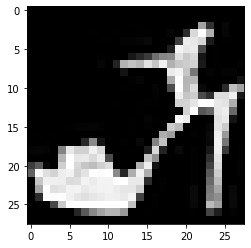

CNN layer filters
(28, 28, 10)


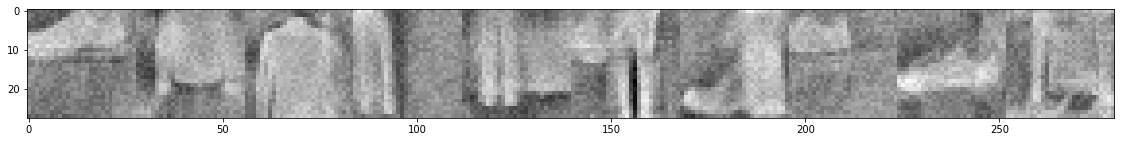

CNN Layer Output
(1, 28, 28, 10)


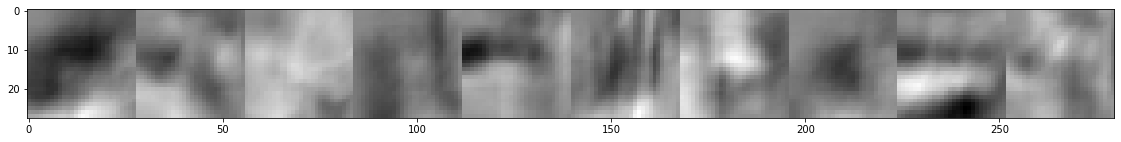

Activation


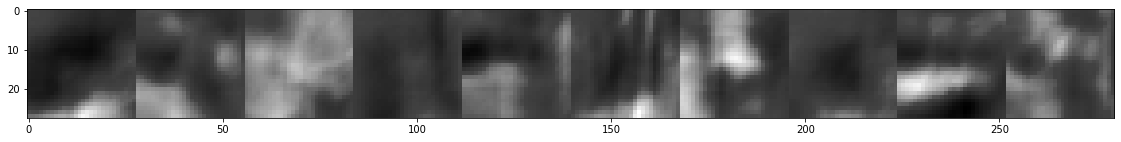

Pooling
[4.580509   3.2521675  3.2780602  0.49506733 1.9543152  4.858844   4.6503797  1.7415664  4.5688148  3.1178734 ]
Softmax
[-1.2237520e+00  1.2639780e+00 -1.5694587e-01 -1.2679168e+00  1.4593606e+00 -2.0517159e+00  1.9511453e+00
  1.1467551e+00  1.5086380e+00 -7.1904212e-01  1.4956858e+00 -3.6518715e-02 -7.4501282e-01  6.5962255e-01
  7.2553712e-01 -2.1020694e+00  2.4177736e-01  9.2506278e-01  4.1777343e-03  1.7239608e+00  5.1479197e-01
 -1.4784491e+00  3.0040301e-02 -1.1267605e+00  2.2079225e-01  1.3868546e+00  2.4363883e+00  3.0539030e-01
  6.1749941e-01  1.2245079e+00  1.3150862e-01  1.2844558e+00  1.7647502e+00  1.7927740e+00 -3.7030852e+00
  1.1348053e+00  1.1551185e+00  1.0881751e+00 -1.8648351e+00  8.9550215e-01  2.2499457e-01 -1.5090244e+00
 -2.5562394e+00  1.9871920e+00  1.8450609e+00  3.7599986e+00  1.4545952e+00  1.5812960e-01  5.1571655e-01
 -2.3464150e+00  1.5878229e+00 -3.4946227e-01 -2.7899749e+00  1.5294464e+00 -1.1318070e+00 -1.2027988e+00
  2.4453299e+00  1.90321

In [ ]:
#A function to get the output of all layers (except the first which is the input layer)
image_index=8


layers=tf.keras.backend.function([model.input],[ l.output for l in model.layers[1:]])


layers_output=layers([X_train[image_index:image_index+1]])

print("Input")
plt.imshow(np.squeeze(X_train[image_index]),cmap='gray')
plt.show()

print("CNN layer filters")

filters=np.squeeze(model.layers[1].get_weights()[0])
print(filters.shape)
filter_stack=np.hstack([filters[:,:,i] for i in range(10)   ])
f=plt.figure(figsize=(20,2))

plt.imshow(filter_stack,cmap='gray')
plt.show()

print("CNN Layer Output")


print(layers_output[0].shape)
cnn_out=np.squeeze(layers_output[0])

cnn_stack=np.hstack([cnn_out[:,:,i] for i in range(10)   ])
f=plt.figure(figsize=(20,2))
plt.imshow(cnn_stack,cmap='gray')
plt.show()


print("Activation")
act_out=np.squeeze(layers_output[1])

act_stack=np.hstack([act_out[:,:,i] for i in range(10)   ])
f=plt.figure(figsize=(20,2))
plt.imshow(act_stack,cmap='gray')
plt.show()


print("Pooling")
pool_out=np.squeeze(layers_output[2])
print(pool_out)

#layer 3 is just a Flatten

print("Softmax")
p_out=np.squeeze(layers_output[4])
print(p_out)




## Building a better model

1. The simplest thing to improve the above model is to add a Dense layer at the end
    * The Convolutional layer will learn the features that go into the dense network
    * Try the above model with a Dense layer at the end
    * Can you still make sense of the filter's?
    
**Give the above a try**


2. Use lots of /smaller filters

The above model (without the Dense layer) essentially learned a template for each class, this worked ok, but doesn't work in general or if you have a huge number of classes. Instead of using a few big filters, we can use a number of small filters, and stack them into deep networks.

* This model will use several small filters
* The layers will be stacked
    * Earlier layer's will do simple things like edge detection
    * Later layers will take those edges as features which lets them learn more complex objects
    
3. Replace MaxPooling with Strided Convolutions
    * Let's the model learn the best way to downsize


# A Better Model

In [ ]:
cnn_input=tf.keras.layers.Input( shape=X_train.shape[1:] ) # Shape here does not including the batch size

cnn_layer1=tf.keras.layers.Convolution2D(64, (4,4),strides=2,padding='same')(cnn_input)
cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer1)

cnn_layer2=tf.keras.layers.Convolution2D(64, (4,4),strides=2,padding='same')(cnn_activation)
cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer2)

cnn_layer3=tf.keras.layers.Convolution2D(64, (4,4),strides=2,padding='same')(cnn_activation)
cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer3)

flat=tf.keras.layers.Flatten()(cnn_activation)

dense_layer=tf.keras.layers.Dense(10)(flat)
output=tf.keras.layers.Activation('softmax')(dense_layer)

model=tf.keras.models.Model([cnn_input],[output])
model.summary()



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history=model.fit(X_train, Y_train_one_hot,
          batch_size=32, epochs=5, verbose=1,
         validation_data=(X_develop,Y_develop_one_hot)
         )


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1088      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          65600     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          65600     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4, 4, 64)         

KeyboardInterrupt: ignored

In [ ]:

def plot_history(history):
    plt.plot(history.history['loss'],label='Train')
    plt.plot(history.history['val_loss'],label='Develop')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim((0,1.5*np.max(history.history['val_loss'])))
    plt.legend()
    plt.show()

In [ ]:
plot_history(history)

NameError: ignored

## Visualize Intermediate Layers

This network works well, but when we try to visualize the 64 filters, and 64 "activation maps" the output becomes a lot harder to interpret . You may have heard this called the 'black box' problem.

Input


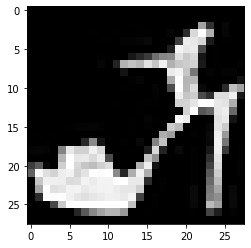

CNN layer filters
(4, 4, 64)


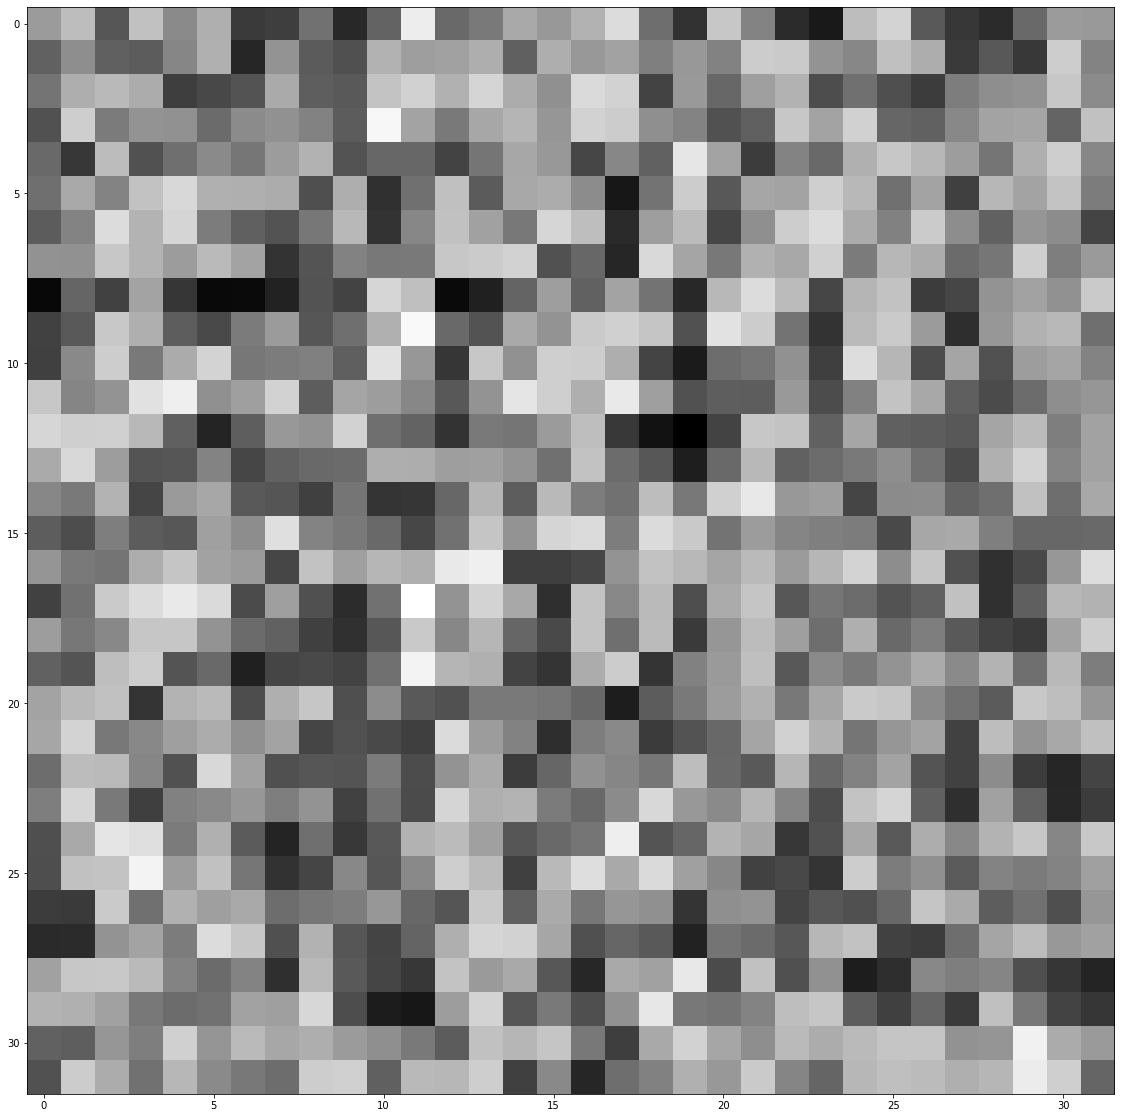

CNN Layer Output
(1, 14, 14, 64)


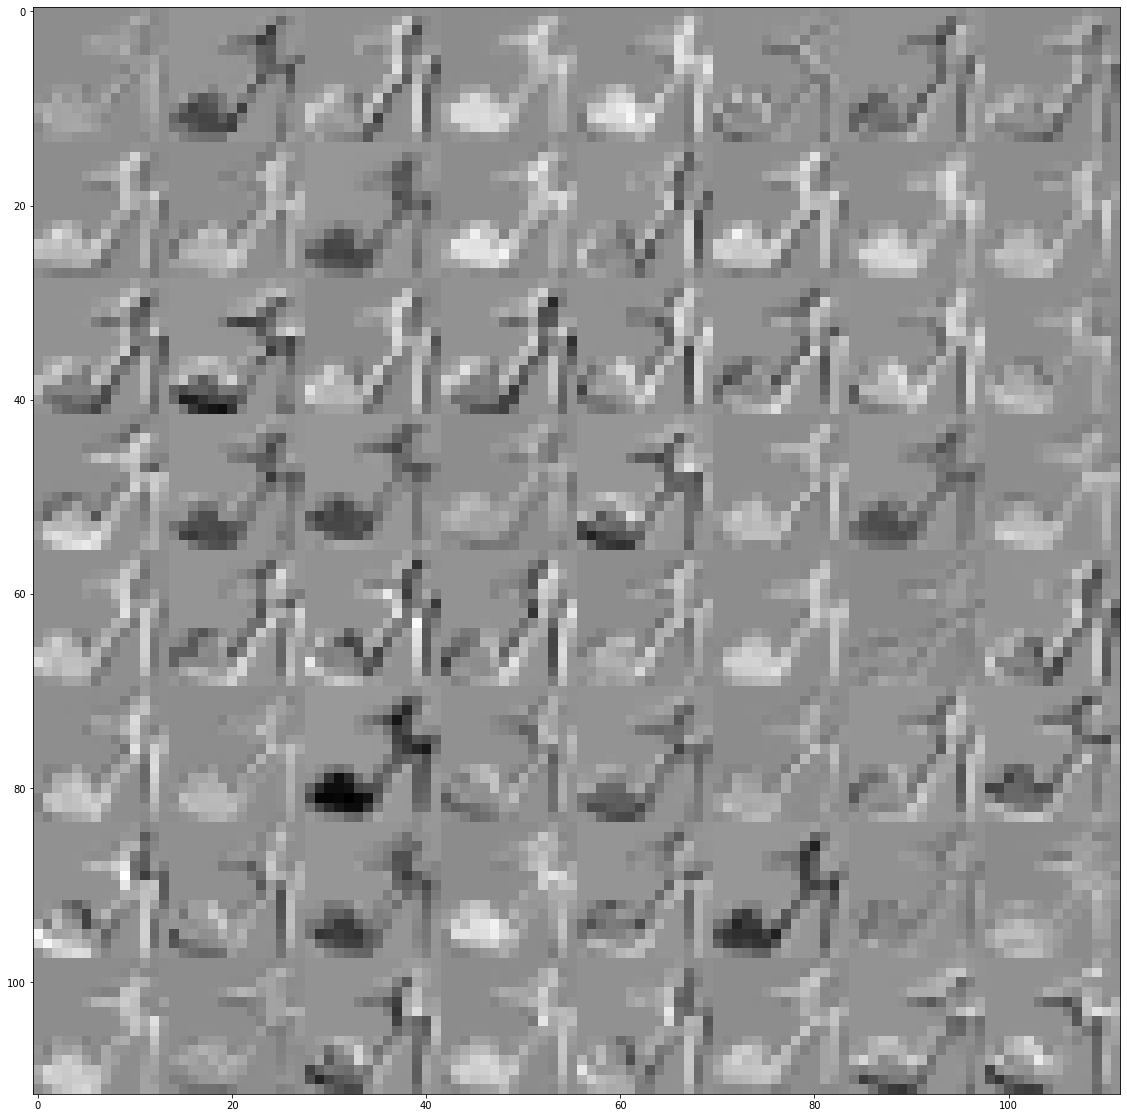

Activation


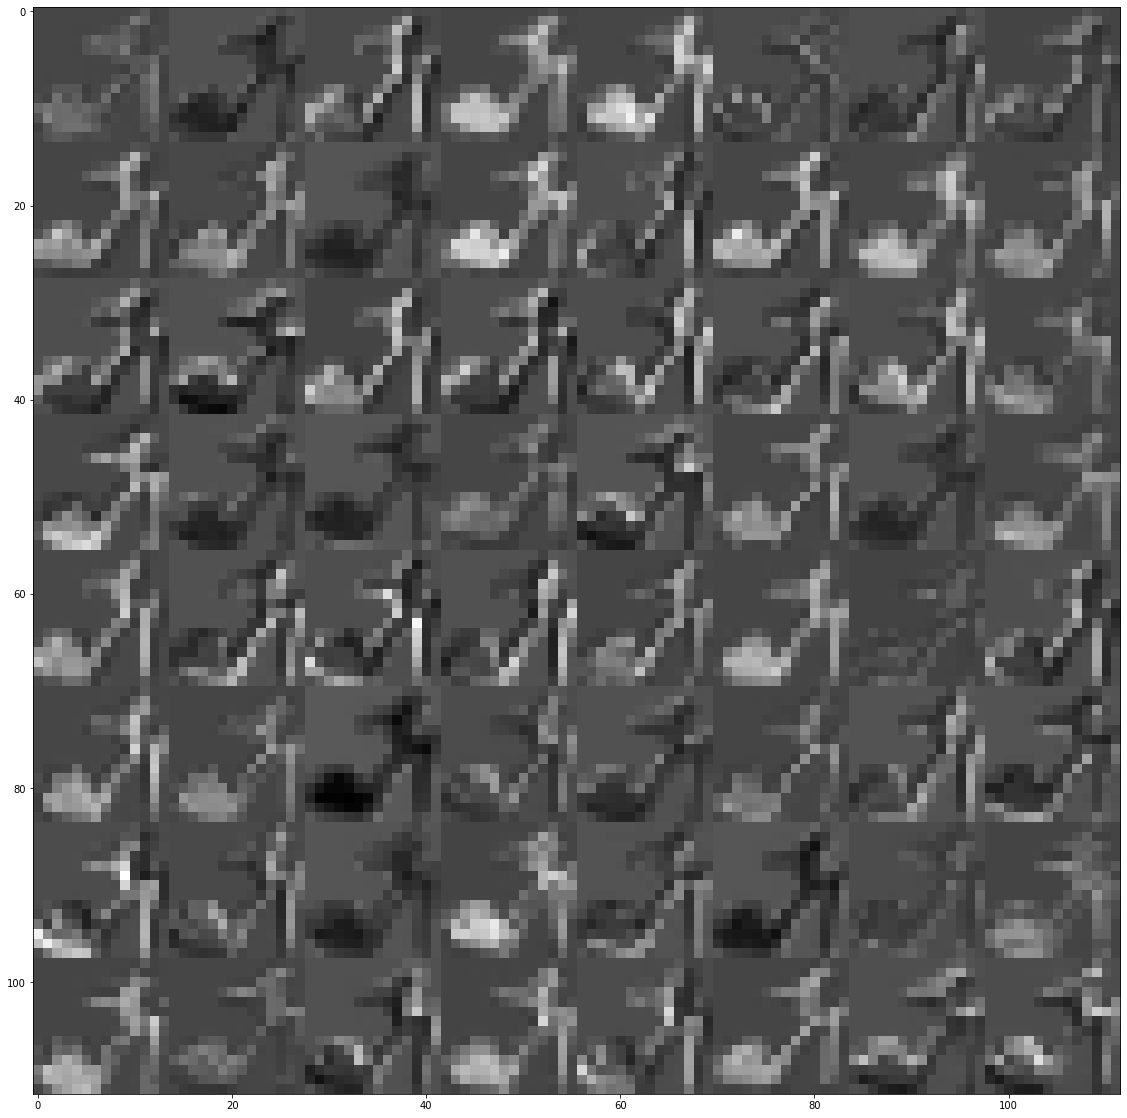

CNN Layer Output
(1, 7, 7, 64)


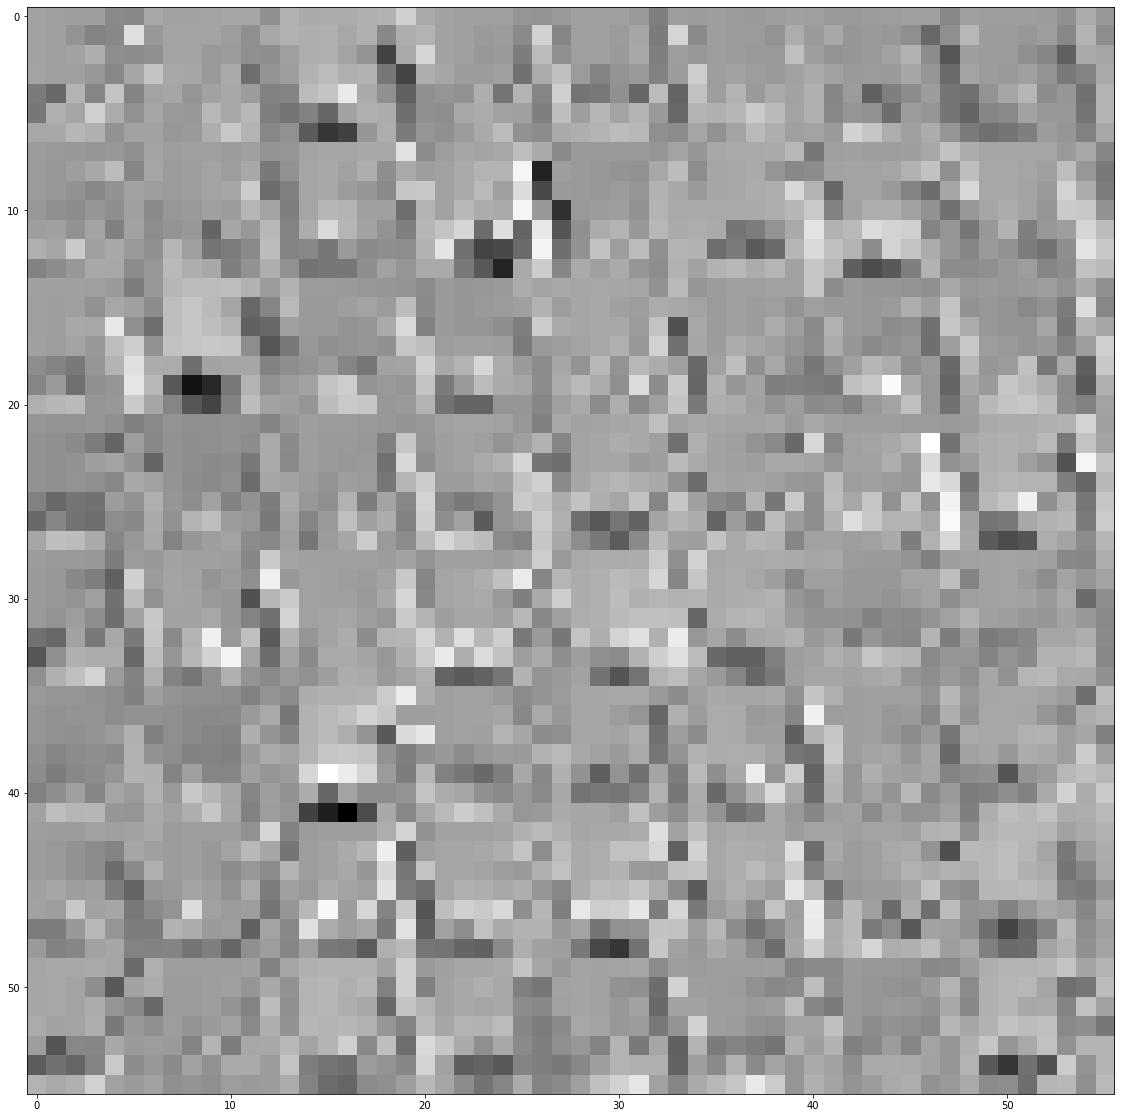

Activation


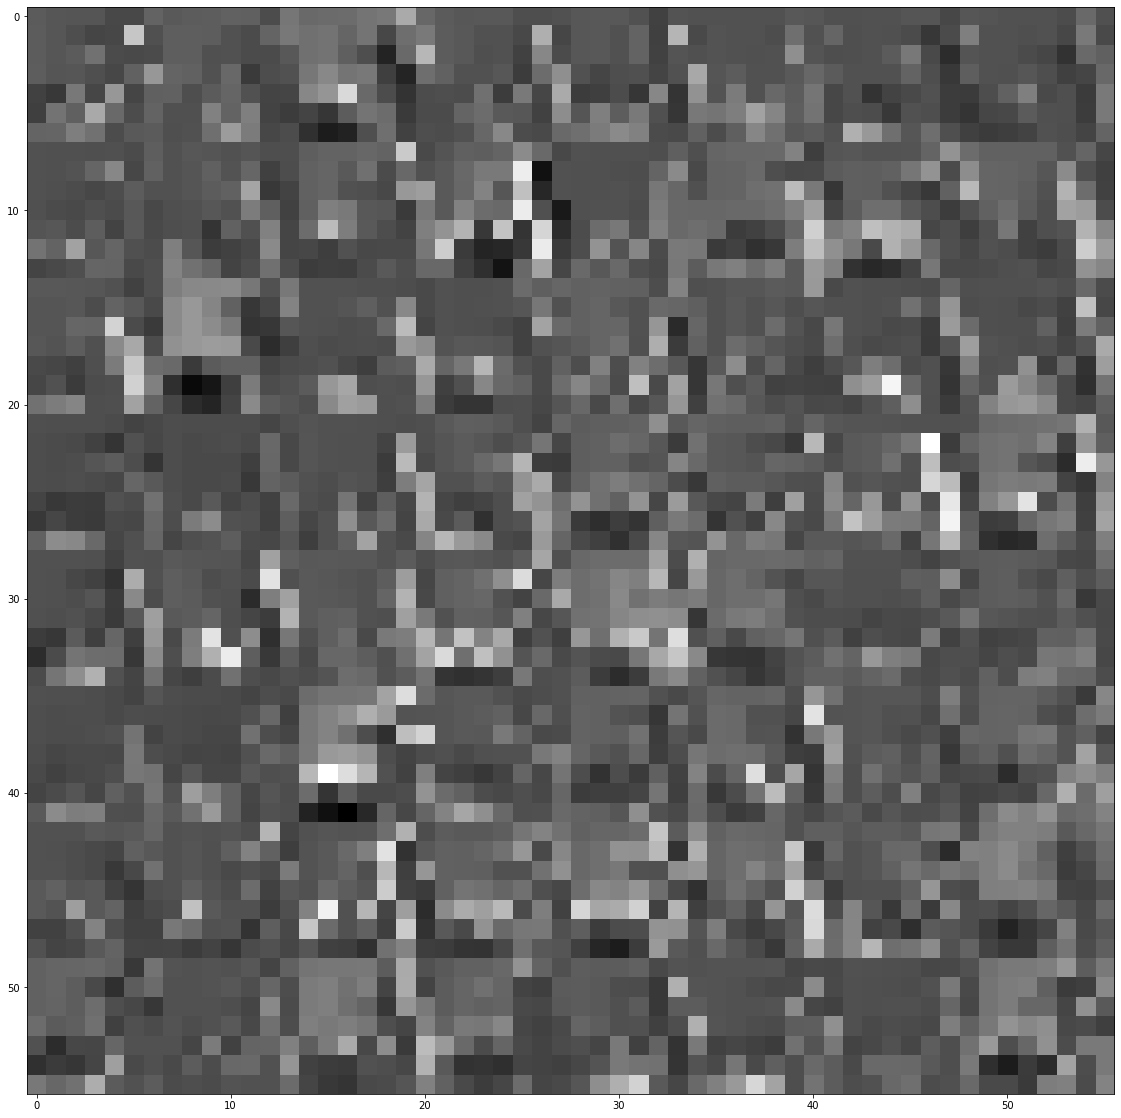

CNN Layer Output
(1, 4, 4, 64)


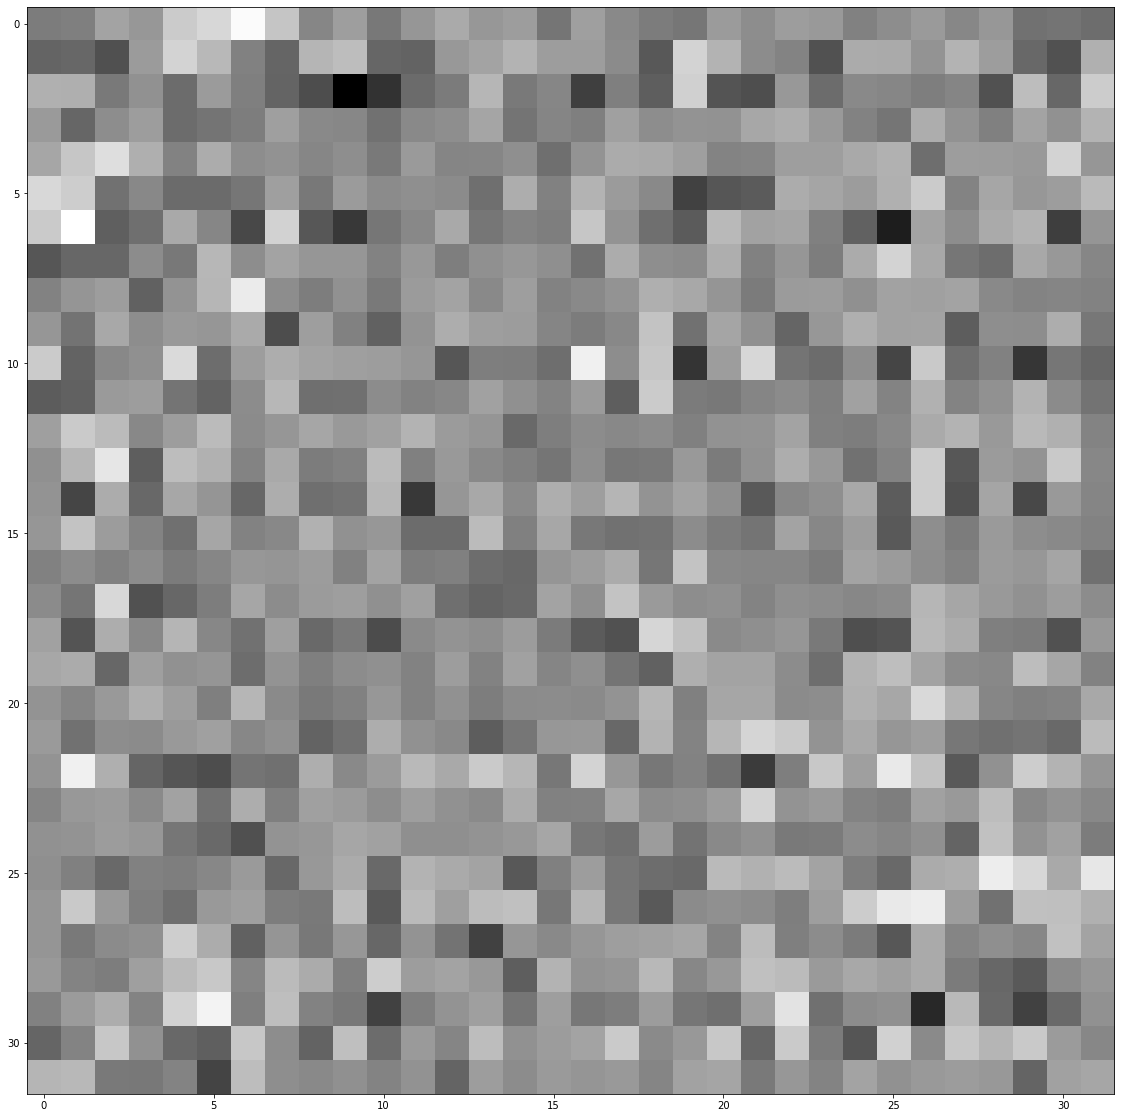

Activation


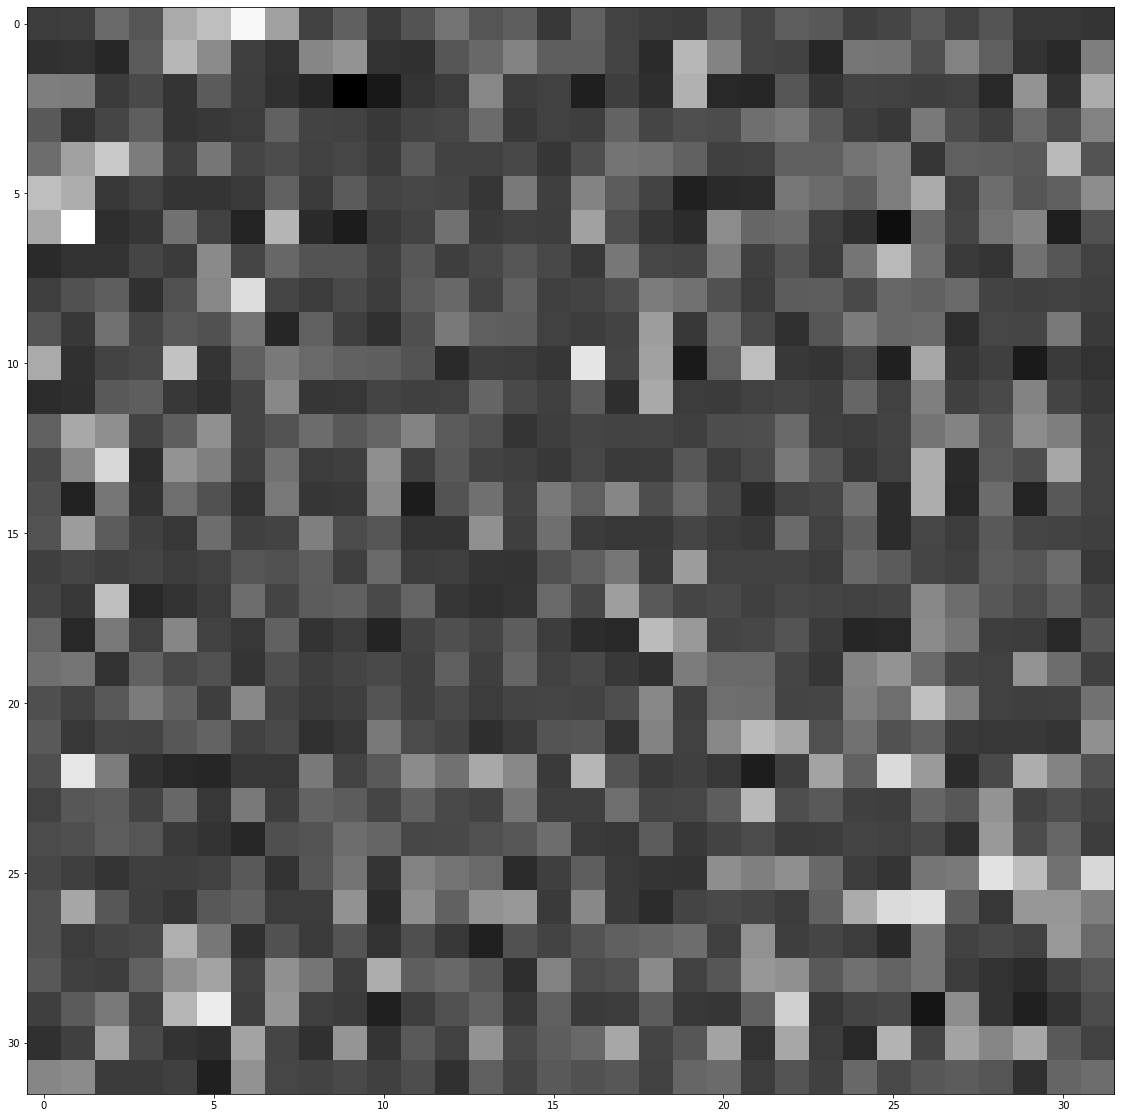

Softmax
[1.9553034e-05 5.1063671e-07 6.9704997e-06 2.8539703e-06 3.1707982e-06 9.9909198e-01 6.5378705e-04 1.0377014e-05
 1.8744357e-04 2.3386925e-05]


In [ ]:
#A function to get the output of all layers (except the first which is the input layer)
image_index=8


layers=tf.keras.backend.function([model.input],[ l.output for l in model.layers[1:]])


layers_output=layers([X_train[image_index:image_index+1]])

print("Input")
plt.imshow(np.squeeze(X_train[image_index]),cmap='gray')
plt.show()


print("CNN layer filters")

filters=np.squeeze(model.layers[1].get_weights()[0])
print(filters.shape)
filter_stack=np.vstack([np.hstack([filters[:,:,i+n*8] for i in range(8)   ]) for n in range(8)])
f=plt.figure(figsize=(20,20))

plt.imshow(filter_stack,cmap='gray')
plt.show()


for layer_index in range(3):

    print("CNN Layer Output")


    print(layers_output[layer_index*2].shape)
    cnn_out=np.squeeze(layers_output[layer_index*2])

    cnn_stack= np.vstack([  np.hstack([cnn_out[:,:,i+8*n] for i in range(8)   ]) for n in range(8)])

    f=plt.figure(figsize=(20,20))
    plt.imshow(cnn_stack,cmap='gray')
    plt.show()


    print("Activation")
    act_out=np.squeeze(layers_output[1+layer_index*2])

    act_stack= np.vstack([  np.hstack([act_out[:,:,i+8*n] for i in range(8)   ]) for n in range(8)])


    f=plt.figure(figsize=(20,20))
    plt.imshow(act_stack,cmap='gray')
    plt.show()


#    print("Pooling")
#    pool_out=np.squeeze(layers_output[2])
#    print(pool_out)

#layer 3 is just a Flatten

print("Softmax")
p_out=np.squeeze(layers_output[-1])
print(p_out)




# Overfitting

Overfitting generally refers to a trend for ML models to find and exploit statistical fluctuations in your training data that don't accurately reflect the system you are trying to learn. You can think of this a 'memorizing' without any real understanding. A good way of testing whether this is happening or not is to compare the training loss to the loss calculated on a new set of data (with it's own different statistical fluctuations)

* Overfitting is combated
    * with Dropout (more on that later)
    * with less training or Early stopping (see https://keras.io/callbacks/#earlystopping)

Keras's fit function returns a history object that shows the loss of the training and testing set we can check it for signs of overfitting.

* You expect for the training and testing loss to go down
* If the model starts overfitting
    * you'll see the testing loss stop decreasing and even go up
    * Training loss will continue to go down
* An important detail: Keras has two learning_phases
    * Training: The Model is training and dropout is on reducing available information
    * Testing: This is the setting when using the model for real, dropout is disabled
    * The Training loss is calculated with the training phase (dropout on)
    * The Testing loss is calculated with the testing phase (dropout off)
        * You will often see the Training loss is greater than the testing loss, this is okay if you're using dropout
        * It might not be okay if you're using your own data without dropout
            * Could be a sign the testing data is distributed differently than the training data

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend()
plt.xlabel('Epoch')
plt.show()

NameError: ignored

Any sign of overfitting?

# Prediction
Lets look at how the model makes predictions


T-shirt/top 0.0 %
Trouser 0.0 %
Pullover 0.01 %
Dress 0.0 %
Coat 0.01 %
Sandal 19.6 %
Shirt 0.01 %
Sneaker 9.47 %
Bag 2.24 %
Ankle boot 68.66 %
best guess: Ankle boot


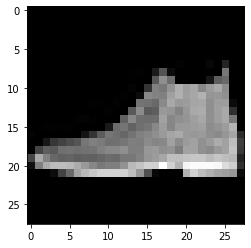

Truth Class: 9 Ankle boot


In [ ]:
pred=model.predict(X_test)
for i,p in enumerate(pred[0]):
    print(lookup_dict[i],round(p*100,2),'%')

best_guess=np.argmax(pred[0])
print('best guess:',lookup_dict[best_guess])
plt.imshow(np.squeeze(X_test[0]),cmap='gray')
plt.show()

print('Truth Class:',Y_test[0],lookup_dict[Y_test[0]])


Notice Above that the while the most likely guess is correct (Ankle boot when I ran it 23.2 percent), the model still isn't that confident in it's result. So while the accuracy is good there is still some improvements that might give you better confidences, and lower losses.  

## Other Checks

### Confusion matrix

A confusion matrix is a 2-D histogram with the dimensions being the true class, and the predicted class.
The diagonal bins in this histogram are correct prediction true_class==predicted_class, otherwise it is an
incorrect prediction. Run the cell below and see if you can guess which class is hardest to identify

making 10000 predictions for 10 classes


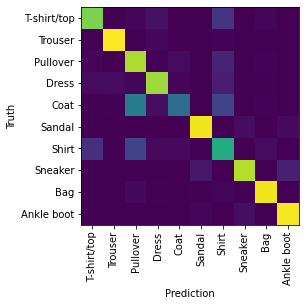

Number of Incorrect Guesses: 1998


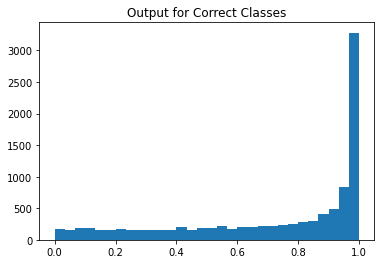

Guess: Dress /Truth: Trouser


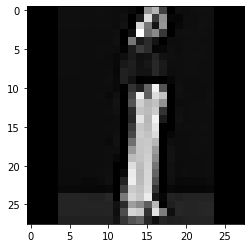

Guess: Bag /Truth: T-shirt/top


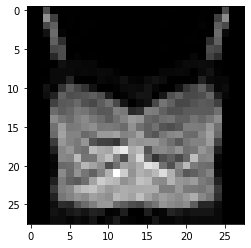

Guess: Sneaker /Truth: Bag


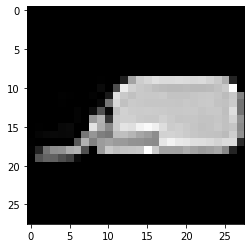

Guess: Dress /Truth: Trouser


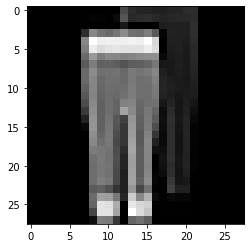

Guess: Shirt /Truth: Bag


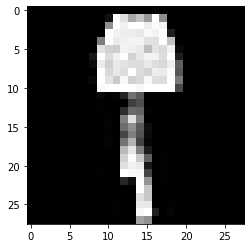

In [ ]:
def check(model,x,y):
    pred=model.predict(x)
    print("making", pred.shape[0], "predictions for", pred.shape[1], "classes")
    best_guess=np.argmax(pred,axis=1)

    confusion_matrix=np.zeros((n_targets,n_targets))
    for truth,guess in zip(y,best_guess):
        confusion_matrix[truth,guess]+=1

    plt.imshow(confusion_matrix)
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.xticks(range(0,10),labels,rotation=90)
    plt.yticks(range(0,10),labels)

    plt.show()
    print('Number of Incorrect Guesses:',np.sum(best_guess!=y))


    prediction_for_true_value=[p[i] for p,i in zip(pred,y)  ]

    bins=plt.hist(prediction_for_true_value,bins=30,range=(0,1))
    plt.title('Output for Correct Classes')

    worst=np.argsort(prediction_for_true_value)


    plt.show()
    plt.show()

    for index in worst[0:5]:
        print("Guess:", lookup_dict[best_guess[index]], "/Truth:",lookup_dict[y[index]])
        plt.imshow(np.squeeze(x[index]),cmap='gray')
        plt.show()


check(model,X_test,Y_test)




## Tips and Tricks

* Dropout
* Data Augmentation
* Which Activation functions to use inside your network


In [ ]:
#Lets Put of this together into some helpful functions
def build_model(dropout_rate=0.25,nfilters=32,use_leakyRelu=False,activation='relu'):
    if use_leakyRelu:
        activation='linear'

    cnn_input=tf.keras.layers.Input( shape=X_train.shape[1:] ) # Shape here does not include the batch size
    cnn_layer1=tf.keras.layers.Convolution2D(nfilters, (3, 3), activation=activation)(cnn_input) #Notice here calling the layer with cnn_input as an argument connects the input layer to this layer
    if use_leakyRelu:cnn_layer1=tf.keras.layers.LeakyReLU()(cnn_layer1)
    cnn_layer2=tf.keras.layers.Convolution2D(nfilters, (3, 3), activation=activation)(cnn_layer1)
    if use_leakyRelu:cnn_layer2=tf.keras.layers.LeakyReLU()(cnn_layer2)

    max_pool=tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cnn_layer2)
    dropout=tf.keras.layers.Dropout(dropout_rate)(max_pool)
    flat=tf.keras.layers.Flatten()(dropout)

    dense1=tf.keras.layers.Dense(128, activation=activation)(flat)

    dropout_output=tf.keras.layers.Dropout(dropout_rate)(dense1)
    output_no_a=tf.keras.layers.Dense(10)(dropout_output)
    output=tf.keras.layers.Activation('softmax')(output_no_a)
    model=tf.keras.models.Model([cnn_input],[output])
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

def plot_history(history):
    plt.plot(history.history['loss'],label='Training Loss')
    plt.plot(history.history['val_loss'], label='Testing Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()



# Dropout

A great diagram I took from the link below.

<img src="https://cdn-images-1.medium.com/max/1600/1*f8YjtxaYPid1Ilkw0tImaw.png">
<a href=https://medium.com/@ahmdtaha/dropout-as-a-bayesian-approximation-representing-model-uncertainty-in-deep-learning-7a2e49e64a15> Link to Article </a>


Dropout randomly removes X% (where x is a hyperparameter) of the data from the previous layer, which makes memorizing the data much more difficult. This encourages the model to learn meaningful and independent features.

Lets look what happens when we train different models, with only a small fraction training dataset (500 images)


### Dropout 0% (no dropout)
<img src="https://github.com/jsearcy1/BI608-2020/blob/master/assets/dropout_0.png?raw=1"  >
This model quickly overfits

### Dropout 50%
<img src="https://github.com/jsearcy1/BI608-2020/blob/master/assets/dropout_0_50.png?raw=1" >
This model does a bit better but over time still overfits


### Dropout 70%
<img src="https://github.com/jsearcy1/BI608-2020/blob/master/assets/dropout_0_70.png?raw=1"  >
This model overfits even slower


### Dropout 90%
<img src="https://github.com/jsearcy1/BI608-2020/blob/master/assets/dropout_0_90.png?raw=1" >
This model does not overfit, but takes much longer to train







In [ ]:
import numpy as np
print(Y_train.shape)
train_data=np.random.choice(range(0,len(X_train))  ,500 )

(48037,)


In [ ]:

#Some code to produce the plots above
if False:
    for rate in [0,0.5,0.7,0.9]:
        new_model=build_model(dropout_rate=rate)
        print('Dropout Rate ',rate)
        history=new_model.fit(X_train, Y_train_one_hot[train_data],
              batch_size=32, epochs=200, verbose=0,
             validation_data=(X_develop,Y_develop_one_hot) )
        score = new_model.evaluate(X_develop, Y_develop_one_hot)
        print("Develop loss: {}, Develop accuracy: {}".format(*score))

        score = new_model.evaluate(X_train, Y_train_one_hot[train_data])
        print("Train loss: {}, Train accuracy: {}".format(*score))


        plot_history(history)


# Activations

Activations vary mainly on the output layer of a network
* Binary Classification: Sigmoid
* Multi-Class Classification: SoftMax
* Regression: Linear


However, activations can have a large impact on training.
* I normally use a LeaklyReLU as my default choice
  * Has non zero derivatives at +/- infinity

See how some of the activation change below


In [ ]:
x=np.expand_dims(np.linspace(-10,10,50),1)

act_input=tf.keras.Input((1,)) #Notice the comma after 1, this is a 1 dimentional input to keras
output=tf.keras.layers.LeakyReLU()(act_input) #This is an "Advanced Activation, so it has it's own layer"


sess=tf.keras.backend.get_session()
output=sess.run(output,feed_dict={act_input:x})
plt.plot(x,output)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('LeakyReLU')
plt.show()


plt.figure(figsize=(15,15))
for i,activation in enumerate(['elu','selu','relu','softplus','softsign','tanh','sigmoid','hard_sigmoid','linear']):
    plt.subplot(3,3,i+1)
    output=tf.keras.layers.Activation(activation)(act_input)
    sess=tf.keras.backend.get_session()
    output=sess.run(output,feed_dict={act_input:x})
    plt.plot(x,output)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title(activation)
plt.show()


AttributeError: ignored

## Sigmoid

In [ ]:
model=build_model(dropout_rate=0.50,nfilters=32,activation='sigmoid')
history=model.fit(X_train, Y_train_one_hot,
      batch_size=32, epochs=10,
     validation_data=(X_develop,Y_develop_one_hot) )
score = model.evaluate(X_develop, Y_develop_one_hot)
print("Develop loss: {}, Develop accuracy: {}".format(*score))

score = model.evaluate(X_train, Y_train_one_hot)
print("Train loss: {}, Train accuracy: {}".format(*score))
check(model,X_develop,Y_develop)
plot_history(history)

Epoch 1/10
 376/1502 [======>.......................] - ETA: 1:02 - loss: 1.7807 - accuracy: 0.3350

## Leaky ReLU

In [ ]:
model=build_model(dropout_rate=0.50,nfilters=32,use_leakyRelu=True)
history=model.fit(X_train, Y_train_one_hot,
      batch_size=32, epochs=10,
     validation_data=(X_test,Y_test_one_hot) )
score = model.evaluate(X_test, Y_test_one_hot)
print("Test loss: {}, Test accuracy: {}".format(*score))

score = model.evaluate(X_train, Y_train_one_hot)
print("Train loss: {}, Train accuracy: {}".format(*score))
check(model,X_develop,Y_develop)
plot_history(history)

# Give it a Try on the cifar dataset
* Try some of the options above to get the best accuracy you can with cifar?


In [ ]:
(_cfxtrain, _cfytrain), (cfX_test, cfY_test) = tf.keras.datasets.cifar10.load_data()

input_two=tf.keras.layers.Input((10,3))

input_layer=tf.keras.layers.Input((10,3))
one=tf.keras.layers.Dense(10)(input_layer)
two=tf.keras.layers.Dense(2)(input_layer)
three=tf.keras.layers.Dense(2)(one)
output=tf.keras.layers.Dense(1)(three)

model=tf.keras.models.Model(input_two,output)

model.summary()

In [ ]:
i